In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from util import plot_decision_regions

iris = load_iris()
data = iris.data[:,[2,3]]
target = iris.target

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(x_train_std, y_train)

y_predict = ppn.predict(x_test_std)
print("Misclassified Samples: {}".format((y_test != y_predict).sum()))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_predict)))

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x_combined_std, y_combined, ppn)

plt.show()



Misclassified Samples: 15
Accuracy Score: 0.6666666666666666


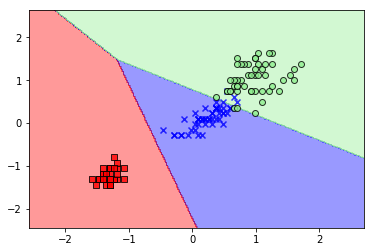

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, lr)
plt.show()

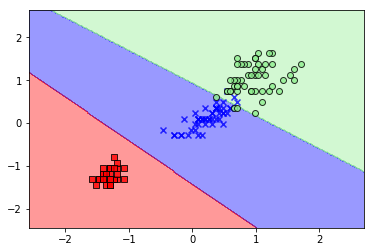

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, svm)
plt.show()

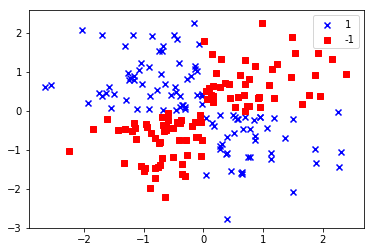

In [5]:
import numpy as np

np.random.seed(0)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:,0] > 0, x_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(x_xor[y_xor==1,0], x_xor[y_xor==1,1], c='b', marker='x', label='1')
plt.scatter(x_xor[y_xor==-1,0], x_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()


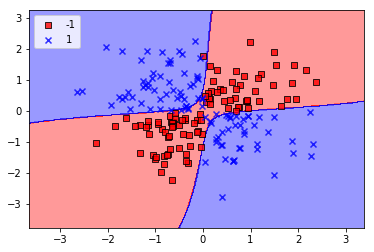

In [6]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

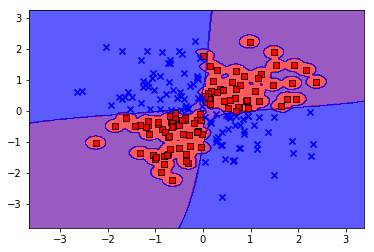

In [7]:
np.random.seed(0)

x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

vm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(x_xor, y_xor)

plot_decision_regions(x_xor, y_xor, classifier=svm)

svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=10.0)
svm.fit(x_xor, y_xor)

plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.show()

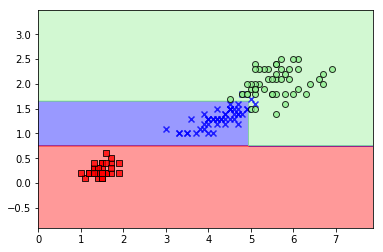

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(x_train, y_train)

X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, tree)
plt.show()

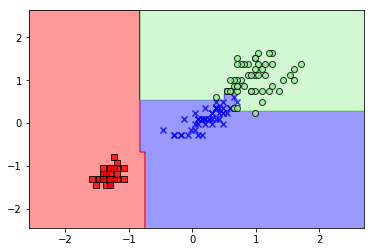

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(x_train_std, y_train)

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x_combined_std, y_combined, forest)

plt.show()

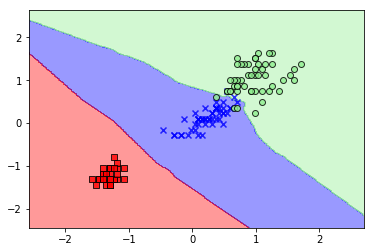

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x_combined_std, y_combined, knn)

plt.show()